In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

In [2]:
df_2023_Ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
df_2023_Bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")

In [3]:
print(df_2023_Ask.head(3))
print(df_2023_Ask.tail(3))
print(df_2023_Bid.head(3))
print(df_2023_Bid.tail(3))


            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.102  24.125  24.083  24.125    0.351
1  2023.01.02 23:05:00  24.094  24.188  24.094  24.141    1.155
2  2023.01.02 23:10:00  24.143  24.148  24.022  24.027    0.882
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.781  22.781  22.776  22.776   0.4212
35218  2023.06.30 20:50:00  22.776  22.797  22.774  22.786   0.6836
35219  2023.06.30 20:55:00  22.786  22.811  22.786  22.811   0.3712
            Time (UTC)    Open    High     Low   Close  Volume 
0  2023.01.02 23:00:00  24.036  24.059  24.017  24.059   0.3480
1  2023.01.02 23:05:00  24.064  24.130  24.064  24.092   1.8458
2  2023.01.02 23:10:00  24.094  24.098  23.972  23.977   0.9030
                Time (UTC)    Open    High     Low   Close  Volume 
35217  2023.06.30 20:45:00  22.751  22.751  22.746  22.746    0.069
35218  2023.06.30 20:50:00  22.746  22.761  22.736  22.756    0.216
35219  2023.

In [4]:
df_2023_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open        35220 non-null  float64
 2   High        35220 non-null  float64
 3   Low         35220 non-null  float64
 4   Close       35220 non-null  float64
 5   Volume      35220 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [5]:
#merge data
df_2023 = df_2023_Bid.merge(df_2023_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [6]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  35220 non-null  object 
 1   Open_x      35220 non-null  float64
 2   High_x      35220 non-null  float64
 3   Low_x       35220 non-null  float64
 4   Close_x     35220 non-null  float64
 5   Volume _x   35220 non-null  float64
 6   Open_y      35220 non-null  float64
 7   High_y      35220 non-null  float64
 8   Low_y       35220 non-null  float64
 9   Close_y     35220 non-null  float64
 10  Volume _y   35220 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.0+ MB


In [7]:
# rename columns

df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [8]:
file_obj2 = open('df_2023.csv','w')
df_2023.to_csv('df_2023.csv', encoding= 'utf-8', index= False)
file_obj2.close()

In [9]:
df_2023 = []
df_2023

[]

In [10]:
df = pd.read_csv('df_2023.csv', low_memory=False, sep=',')

In [11]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [12]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338,26.812151,26.908678,0.030212,0.030212,0.030266,0.030134
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921,33.422609,33.344942,0.003245,0.003380,0.005014,0.003851
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000,-48.791200,0.000000,0.011000,0.018000,0.001000,0.012000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675,5.170550,5.237100,0.030000,0.030000,0.030000,0.030000
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450,14.907800,14.937300,0.030000,0.030000,0.030000,0.030000
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375,36.154925,36.159175,0.030000,0.030000,0.030000,0.030000
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200,317.585800,317.585800,0.185000,0.222000,0.409000,0.309000


In [13]:
data = df.drop(['Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [14]:
data.shape

(35220, 13)

In [15]:
data.head(1)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.348,0.351,0.003,0.003,0.066,0.066,0.066,0.066


In [16]:
#transformation of data
import datetime

In [17]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [18]:
data = data.drop(['Local time'],axis = 1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_Bid          35220 non-null  float64            
 1   High_Bid          35220 non-null  float64            
 2   Low_Bid           35220 non-null  float64            
 3   Close_Bid         35220 non-null  float64            
 4   Volume_Bid        35220 non-null  float64            
 5   Volume_Ask        35220 non-null  float64            
 6   Volume_Delta      35220 non-null  float64            
 7   Volume_Delta_abs  35220 non-null  float64            
 8   Open_Delta        35220 non-null  float64            
 9   High_Delta        35220 non-null  float64            
 10  Low_Delta         35220 non-null  float64            
 11  Close_Delta       35220 non-null  float64            
 12  Local_time_T      35220 non-null  datetime64[ns, UTC]
dtypes

In [20]:
data.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00
1,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00
2,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00


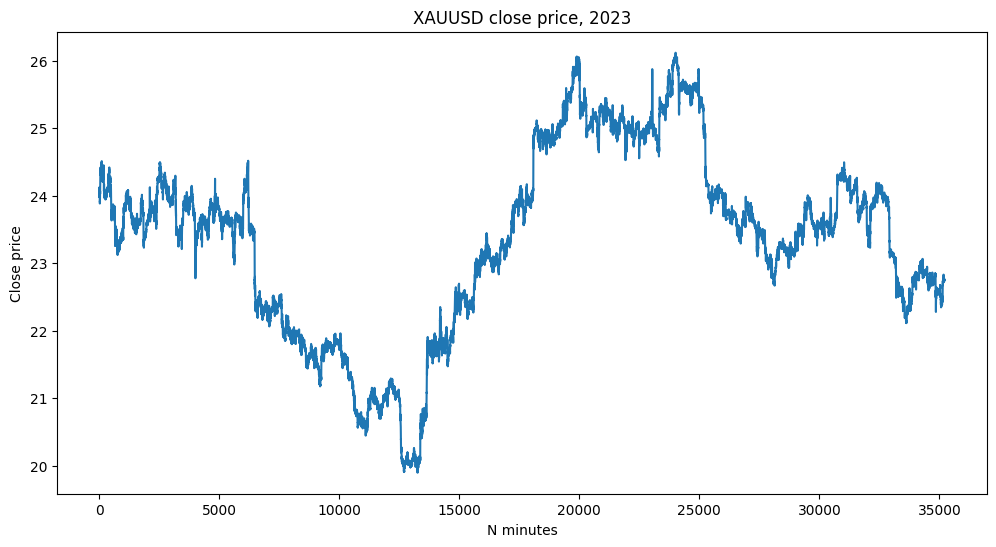

In [21]:
#data visualization
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('XAUUSD close price, 2023')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

In [22]:
data_chart = data.set_index('Local_time_T', inplace = False)

In [23]:
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

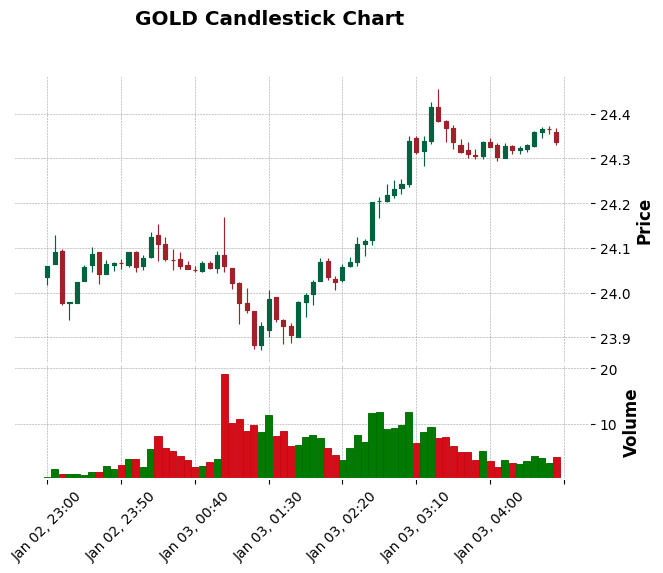

In [24]:
import mplfinance as mpf

data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title = 'GOLD Candlestick Chart', volume = True)

In [25]:
data_chart = []

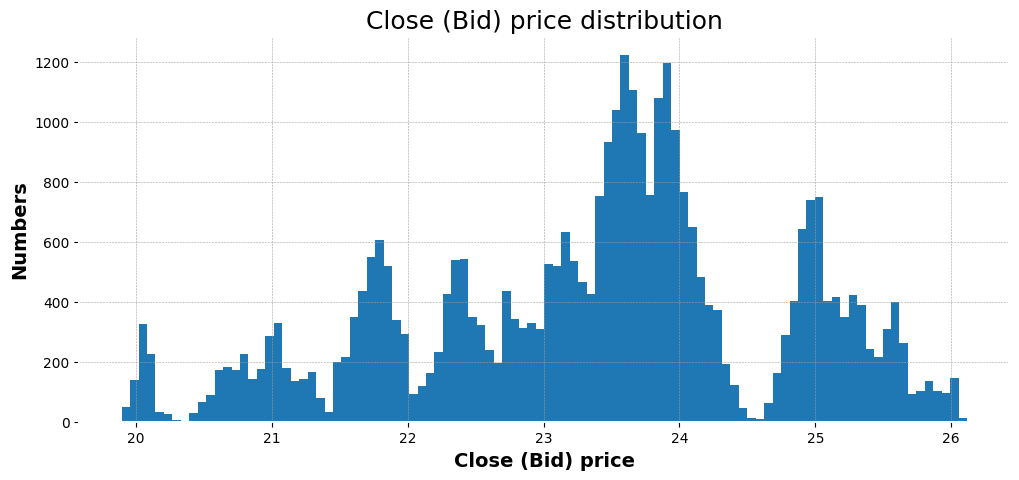

In [26]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14)
plt.show()

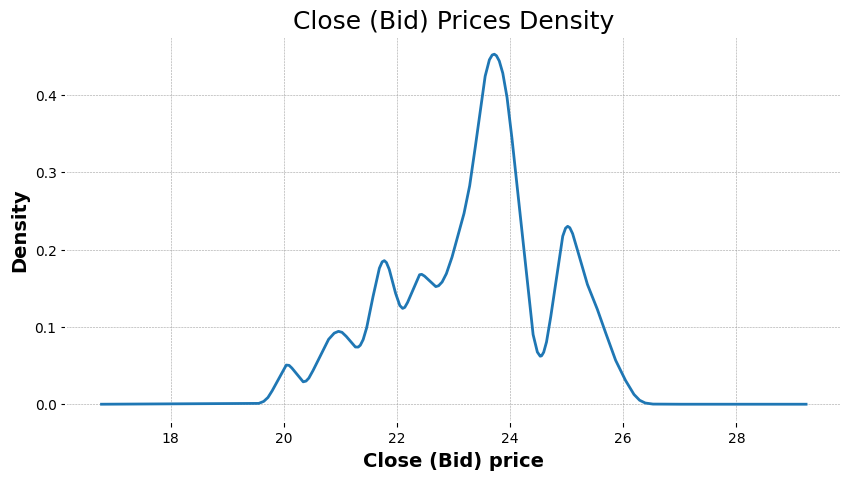

In [27]:
plt.figure(num=1,figsize=(10,5))
data['Close_Bid'].plot.kde()
plt.title('Close (Bid) Prices Density',size=18)
plt.ylabel('Density',size=14)
plt.xlabel('Close (Bid) price',size=14)
plt.show()

<Figure size 1200x500 with 0 Axes>

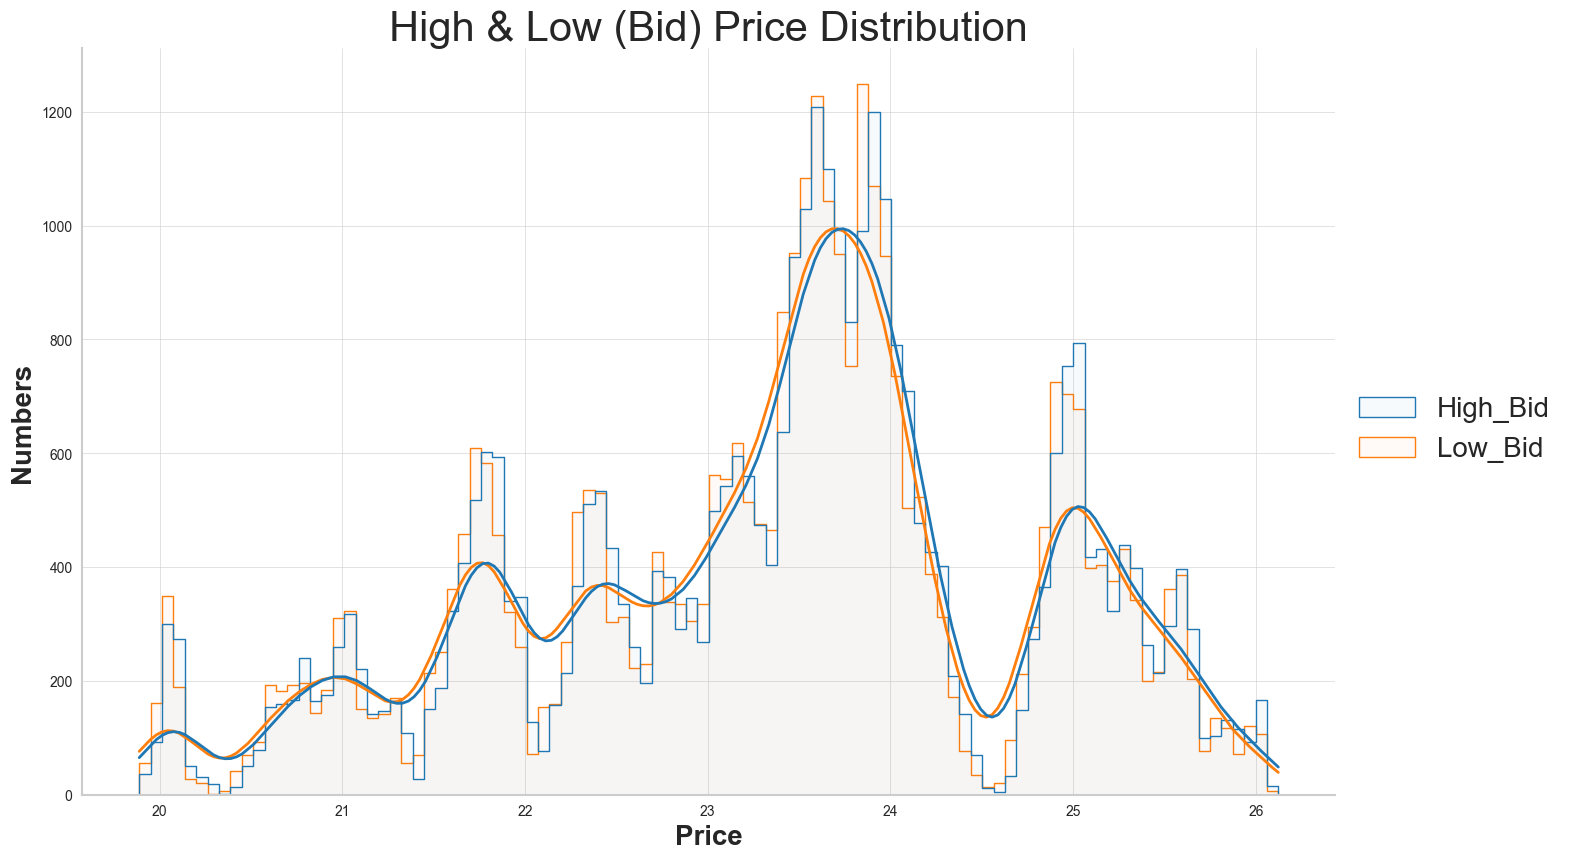

In [28]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show()

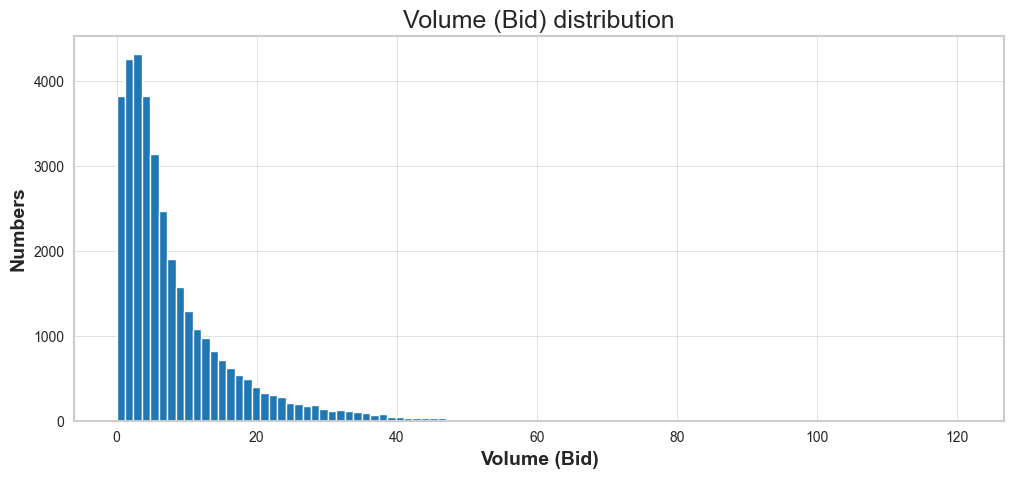

In [29]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14)
plt.show()

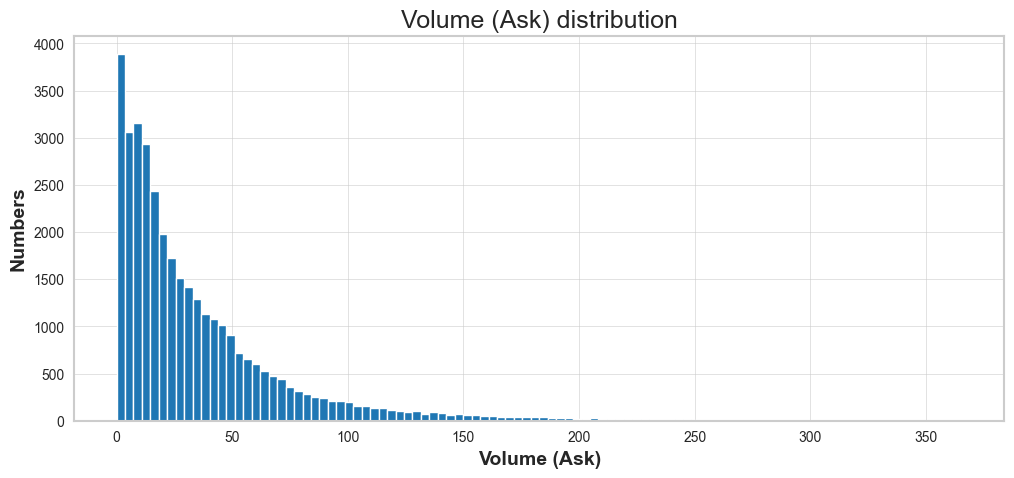

In [30]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volume (Ask) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Ask)',size=14)
plt.show()

In [31]:
#print the thin long tail of volume(bid and ask) hist
vol_350k = data[(data['Volume_Bid'] > 0.35) | (data['Volume_Ask'] > 0.35)]

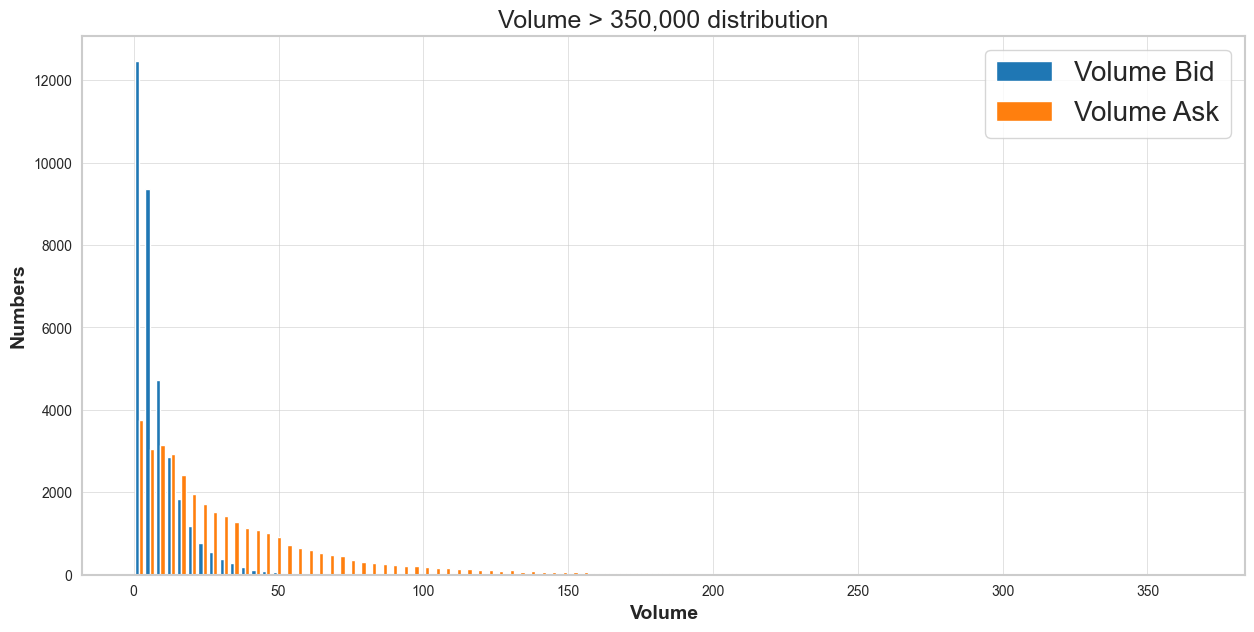

In [32]:
plt.figure(num=1,figsize=(15,7))

plt.hist(vol_350k[['Volume_Bid','Volume_Ask']],bins=100)
plt.legend(['Volume Bid', 'Volume Ask'])
plt.title('Volume > 350,000 distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume',size=14)
plt.show()

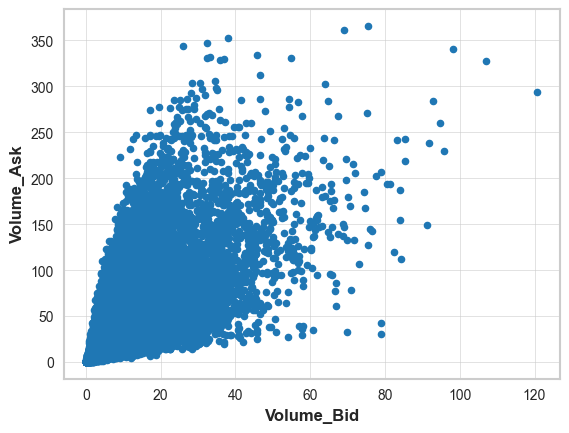

In [33]:
vol_350k.plot.scatter(x='Volume_Bid',y='Volume_Ask')
plt.show()

In [34]:
# Create a new time column by moving it down one row

data['Local_time_T_shipt_1_Down'] = data['Local_time_T'].shift(1)

In [35]:
data["Local_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

In [36]:
data.head(-2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta
0,24.036,24.059,24.017,24.059,0.3480,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,NaT
1,24.064,24.130,24.064,24.092,1.8458,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00,2023-01-02 23:00:00+00:00,0 days 00:05:00
2,24.094,24.098,23.972,23.977,0.9030,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00,2023-01-02 23:05:00+00:00,0 days 00:05:00
3,23.977,23.980,23.938,23.980,0.8940,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048,2023-01-02 23:15:00+00:00,2023-01-02 23:10:00+00:00,0 days 00:05:00
4,23.978,24.024,23.976,24.023,0.8880,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050,2023-01-02 23:20:00+00:00,2023-01-02 23:15:00+00:00,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35213,22.733,22.747,22.728,22.742,1.9267,3.4873,1.5606,1.5606,0.030,0.030,0.030,0.030,2023-06-30 20:25:00+00:00,2023-06-30 20:20:00+00:00,0 days 00:05:00
35214,22.742,22.752,22.739,22.752,0.3622,1.4552,1.0930,1.0930,0.030,0.030,0.030,0.030,2023-06-30 20:30:00+00:00,2023-06-30 20:25:00+00:00,0 days 00:05:00
35215,22.752,22.752,22.741,22.746,0.2752,1.8002,1.5250,1.5250,0.030,0.030,0.030,0.030,2023-06-30 20:35:00+00:00,2023-06-30 20:30:00+00:00,0 days 00:05:00
35216,22.736,22.751,22.736,22.746,0.1410,0.7568,0.6158,0.6158,0.039,0.030,0.039,0.030,2023-06-30 20:40:00+00:00,2023-06-30 20:35:00+00:00,0 days 00:05:00


In [37]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).

data.loc[data.index[0], 'Local_time_T_Delta'] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

Timedelta('2 days 01:01:00')

In [38]:
data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:01:00'].value_counts(sort= False)

Local_time_T_Delta
0 days 00:05:00       35092
0 days 01:05:00          99
0 days 03:35:00           2
0 days 05:05:00           1
2 days 00:05:00           1
2 days 01:01:00           1
2 days 01:05:00          23
3 days 01:05:00           1
Name: count, dtype: int64

In [39]:
new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:01:00']

In [40]:
new_day['Local_time_T_Delta'].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00        1
0 days 00:05:00    35092
0 days 01:05:00       99
2 days 01:05:00       23
0 days 05:05:00        1
2 days 00:05:00        1
3 days 01:05:00        1
0 days 03:35:00        2
Name: count, dtype: int64

In [41]:
data[['Local_time_T_Delta']][data['Local_time_T_Delta'] > '1 days 00:00:00'].value_counts(sort=False)

Local_time_T_Delta
2 days 00:05:00        1
2 days 01:01:00        1
2 days 01:05:00       23
3 days 01:05:00        1
Name: count, dtype: int64

In [42]:
new_week = data[data["Local_time_T_Delta"] > '1 days 00:00:00']

In [43]:
new_week["Local_time_T_Delta"].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00     1
2 days 01:05:00    23
2 days 00:05:00     1
3 days 01:05:00     1
Name: count, dtype: int64

In [44]:
data['New_day']=0
data['New_week']=0

In [45]:
# Fill in "1" in the starts of day column

data.loc[data["Local_time_T_Delta"] > '0 days 00:01:00', 'New_day'] = 1

In [46]:
data[data["New_day"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.3480,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,2 days 01:01:00,1,0
1,24.064,24.130,24.064,24.092,1.8458,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049,2023-01-02 23:05:00+00:00,2023-01-02 23:00:00+00:00,0 days 00:05:00,1,0
2,24.094,24.098,23.972,23.977,0.9030,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050,2023-01-02 23:10:00+00:00,2023-01-02 23:05:00+00:00,0 days 00:05:00,1,0
3,23.977,23.980,23.938,23.980,0.8940,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048,2023-01-02 23:15:00+00:00,2023-01-02 23:10:00+00:00,0 days 00:05:00,1,0
4,23.978,24.024,23.976,24.023,0.8880,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050,2023-01-02 23:20:00+00:00,2023-01-02 23:15:00+00:00,0 days 00:05:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35215,22.752,22.752,22.741,22.746,0.2752,1.8002,1.5250,1.5250,0.030,0.030,0.030,0.030,2023-06-30 20:35:00+00:00,2023-06-30 20:30:00+00:00,0 days 00:05:00,1,0
35216,22.736,22.751,22.736,22.746,0.1410,0.7568,0.6158,0.6158,0.039,0.030,0.039,0.030,2023-06-30 20:40:00+00:00,2023-06-30 20:35:00+00:00,0 days 00:05:00,1,0
35217,22.751,22.751,22.746,22.746,0.0690,0.4212,0.3522,0.3522,0.030,0.030,0.030,0.030,2023-06-30 20:45:00+00:00,2023-06-30 20:40:00+00:00,0 days 00:05:00,1,0
35218,22.746,22.761,22.736,22.756,0.2160,0.6836,0.4676,0.4676,0.030,0.036,0.038,0.030,2023-06-30 20:50:00+00:00,2023-06-30 20:45:00+00:00,0 days 00:05:00,1,0


In [47]:
# Fill in "1s" in the starts of week column

data.loc[data["Local_time_T_Delta"] >'1 days 00:00:00', 'New_week'] = 1

In [48]:
data[data["New_week"] == 1]

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T,Local_time_T_shipt_1_Down,Local_time_T_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.34800,0.35100,0.00300,0.00300,0.066,0.066,0.066,0.066,2023-01-02 23:00:00+00:00,NaT,2 days 01:01:00,1,1
1104,23.860,23.891,23.809,23.871,2.87340,20.22160,17.34820,17.34820,0.054,0.030,0.054,0.030,2023-01-08 23:00:00+00:00,2023-01-06 21:55:00+00:00,2 days 01:05:00,1,1
2484,24.246,24.258,24.209,24.209,0.75000,0.75000,0.00000,0.00000,0.068,0.059,0.053,0.057,2023-01-15 23:00:00+00:00,2023-01-13 21:55:00+00:00,2 days 01:05:00,1,1
3816,23.897,23.989,23.872,23.929,2.04890,3.06595,1.01705,1.01705,0.070,0.026,0.070,0.030,2023-01-22 23:00:00+00:00,2023-01-20 21:55:00+00:00,2 days 01:05:00,1,1
5196,23.534,23.602,23.534,23.576,3.03920,15.37420,12.33500,12.33500,0.062,0.030,0.054,0.030,2023-01-29 23:00:00+00:00,2023-01-27 21:55:00+00:00,2 days 01:05:00,1,1
6576,22.251,22.299,22.217,22.292,2.89340,16.70575,13.81235,13.81235,0.043,0.030,0.037,0.030,2023-02-05 23:00:00+00:00,2023-02-03 21:55:00+00:00,2 days 01:05:00,1,1
7956,21.965,22.017,21.962,21.983,1.81030,6.03730,4.22700,4.22700,0.090,0.038,0.040,0.030,2023-02-12 23:00:00+00:00,2023-02-10 21:55:00+00:00,2 days 01:05:00,1,1
9336,21.657,21.718,21.637,21.701,0.99730,1.47365,0.47635,0.47635,0.065,0.034,0.048,0.030,2023-02-19 23:00:00+00:00,2023-02-17 21:55:00+00:00,2 days 01:05:00,1,1
10716,20.749,20.825,20.705,20.789,1.73046,1.71218,-0.01828,0.01828,0.098,0.031,0.082,0.030,2023-02-26 23:00:00+00:00,2023-02-24 21:55:00+00:00,2 days 01:05:00,1,1
12096,21.224,21.239,21.174,21.197,4.03290,13.49775,9.46485,9.46485,0.082,0.067,0.030,0.030,2023-03-05 23:00:00+00:00,2023-03-03 21:55:00+00:00,2 days 01:05:00,1,1


In [49]:
# drop the columns that are no longer needed, 
# since the time series is regular 
# (each line is the next minute, except for the marked lines in the New_day and New_week columns

data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

In [50]:
data2.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
0,24.036,24.059,24.017,24.059,0.3480,0.351,0.0030,0.0030,0.066,0.066,0.066,0.066,1,1
1,24.064,24.130,24.064,24.092,1.8458,1.155,-0.6908,0.6908,0.030,0.058,0.030,0.049,1,0
2,24.094,24.098,23.972,23.977,0.9030,0.882,-0.0210,0.0210,0.049,0.050,0.050,0.050,1,0


In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  New_day           35220 non-null  int64  
 13  New_week          35220 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 3.8 MB


In [52]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Bid'] + data2['Low_Delta']

In [53]:
data2.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
35215,22.752,22.752,22.741,22.746,0.2752,1.8002,1.5250,1.5250,0.030,0.030,0.030,0.030,1,0,22.752,22.771
35216,22.736,22.751,22.736,22.746,0.1410,0.7568,0.6158,0.6158,0.039,0.030,0.039,0.030,1,0,22.751,22.775
35217,22.751,22.751,22.746,22.746,0.0690,0.4212,0.3522,0.3522,0.030,0.030,0.030,0.030,1,0,22.751,22.776
35218,22.746,22.761,22.736,22.756,0.2160,0.6836,0.4676,0.4676,0.030,0.036,0.038,0.030,1,0,22.761,22.774
35219,22.756,22.766,22.701,22.745,0.3270,0.3712,0.0442,0.0442,0.030,0.045,0.085,0.066,1,0,22.766,22.786


In [54]:
data_length = len(data)
data_length

35220

In [55]:
train_size = int(round(data_length*0.8,-3))
train_size

28000

In [56]:
train = data2.iloc[:train_size]
train.shape

(28000, 16)

In [57]:
train.tail(2)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
27998,23.049,23.091,23.049,23.067,4.7839,34.8313,30.0474,30.0474,0.03,0.03,0.03,0.03,1,0,23.091,23.079
27999,23.074,23.080,23.029,23.039,5.0757,27.9602,22.8845,22.8845,0.03,0.03,0.03,0.03,1,0,23.080,23.059


In [58]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

26.153

In [59]:
min_price = train['Low_Bid'].min()
min_price

19.888

In [60]:
max_volume = max(max(train['Volume_Bid']),max(train['Volume_Ask']))
max_volume

365.6322

In [61]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta

0.30900000000000105

In [62]:
max_Delta = round(max_Delta, 3)
max_Delta

0.309

In [63]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta

0.0009999999999976694

In [64]:
min_Delta = round(min_Delta, 3)
min_Delta

0.001

In [65]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

317.5858

In [66]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-48.7912

In [67]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

317.5858

In [68]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [69]:
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [70]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [71]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [72]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [73]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

In [74]:
data2.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961,1,1,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671030,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156,1,0,0.677095,0.671349
2,0.671349,0.671987,0.651875,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909,1,0,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403,1,0,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909,1,0,0.660176,0.660016


In [75]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  New_day           35220 non-null  int64  
 13  New_week          35220 non-null  int64  
 14  Y_High_Bid        35220 non-null  float64
 15  Y_Low_Ask         35220 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 4

In [76]:
# memory size reduction

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



In [77]:
for column in columns_float:
    data2[column] = pd.to_numeric(data2[column], downcast='float')
for column in columns_integer:
    data2[column] = pd.to_numeric(data2[column], downcast='integer')
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Volume_Ask        35220 non-null  float32
 6   Volume_Delta      35220 non-null  float32
 7   Volume_Delta_abs  35220 non-null  float32
 8   Open_Delta        35220 non-null  float32
 9   High_Delta        35220 non-null  float32
 10  Low_Delta         35220 non-null  float32
 11  Close_Delta       35220 non-null  float32
 12  New_day           35220 non-null  int8   
 13  New_week          35220 non-null  int8   
 14  Y_High_Bid        35220 non-null  float32
 15  Y_Low_Ask         35220 non-null  float32
dtypes: float32(14), int8(2)
memory usage: 1.

In [78]:
# Do it once!
# Writing a normalised dataset to disk in file GOLD_2020_normilised.csv

file_obj1 = open('XAU_2023_normalised.csv', 'w')
data2.to_csv('XAU_2023_normalised.csv', encoding='utf-8', index=False)
file_obj1.close()

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

In [80]:
import tensorflow as tf
from tensorflow import keras

2025-11-15 12:38:45.683200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:
print(tf.__version__)

2.16.2


In [82]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [83]:
np.random.seed(19)

In [84]:
data = pd.read_csv('XAU_2023_normalised.csv', low_memory=False, sep=',')
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961,1,1,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671029,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156,1,0,0.677095,0.671349
2,0.671349,0.671987,0.651876,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909,1,0,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403,1,0,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909,1,0,0.660176,0.660016


In [85]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
35215,0.457143,0.457143,0.455387,0.456185,0.000753,0.004924,0.137334,0.004802,0.905844,0.905844,0.905844,0.905844,1,0,0.457143,0.460176
35216,0.454589,0.456983,0.454589,0.456185,0.000386,0.002070,0.134853,0.001939,0.876623,0.905844,0.876623,0.905844,1,0,0.456983,0.460814
35217,0.456983,0.456983,0.456185,0.456185,0.000189,0.001152,0.134133,0.001109,0.905844,0.905844,0.905844,0.905844,1,0,0.456983,0.460974
35218,0.456185,0.458579,0.454589,0.457781,0.000591,0.001870,0.134448,0.001472,0.905844,0.886364,0.879870,0.905844,1,0,0.458579,0.460654
35219,0.457781,0.459377,0.449002,0.456026,0.000894,0.001015,0.133293,0.000139,0.905844,0.857143,0.727273,0.788961,1,0,0.459377,0.462570


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float64
 1   High_Bid          35220 non-null  float64
 2   Low_Bid           35220 non-null  float64
 3   Close_Bid         35220 non-null  float64
 4   Volume_Bid        35220 non-null  float64
 5   Volume_Ask        35220 non-null  float64
 6   Volume_Delta      35220 non-null  float64
 7   Volume_Delta_abs  35220 non-null  float64
 8   Open_Delta        35220 non-null  float64
 9   High_Delta        35220 non-null  float64
 10  Low_Delta         35220 non-null  float64
 11  Close_Delta       35220 non-null  float64
 12  New_day           35220 non-null  int64  
 13  New_week          35220 non-null  int64  
 14  Y_High_Bid        35220 non-null  float64
 15  Y_Low_Ask         35220 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 4

In [87]:
# memory size reduction

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
               # 'Open_Ask', 'High_Ask',  'Low_Ask', 'Close_Ask', 
                'Volume_Ask', 
                'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



In [88]:
for column in columns_float:
    data[column] = pd.to_numeric(data[column], downcast= 'float')
for column in columns_integer:
    data[column] = pd.to_numeric(data[column], downcast = 'integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Volume_Ask        35220 non-null  float32
 6   Volume_Delta      35220 non-null  float32
 7   Volume_Delta_abs  35220 non-null  float32
 8   Open_Delta        35220 non-null  float32
 9   High_Delta        35220 non-null  float32
 10  Low_Delta         35220 non-null  float32
 11  Close_Delta       35220 non-null  float32
 12  New_day           35220 non-null  int8   
 13  New_week          35220 non-null  int8   
 14  Y_High_Bid        35220 non-null  float32
 15  Y_Low_Ask         35220 non-null  float32
dtypes: float32(14), int8(2)
memory usage: 1.

In [89]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,3.522000e+04,35220.0,35220.000000,35220.000000,35220.000000
mean,0.553769,0.556522,0.550748,0.553770,0.022654,0.095985,0.206354,0.084729,0.905157,0.905155,0.904980,9.054085e-01,1.0,0.000738,0.556522,0.555579
std,0.218481,0.218488,0.218504,0.218494,0.024550,0.106733,0.091225,0.104995,0.010534,0.010974,0.016278,1.250475e-02,0.0,0.027161,0.218488,0.218507
min,0.000798,0.004150,0.000000,0.000798,0.000000,0.000000,0.000000,0.000000,0.402597,0.282468,-0.324675,-3.424389e-15,1.0,0.000000,0.004150,0.004789
25%,0.404429,0.407342,0.400958,0.404310,0.007141,0.025894,0.147285,0.016490,0.905844,0.905844,0.905844,9.058442e-01,1.0,0.000000,0.407342,0.405746
50%,0.586113,0.588667,0.583400,0.586113,0.014580,0.060819,0.173862,0.047034,0.905844,0.905844,0.905844,9.058442e-01,1.0,0.000000,0.588667,0.588188
75%,0.675818,0.679330,0.672785,0.675818,0.029227,0.127558,0.231854,0.113856,0.905844,0.905844,0.905844,9.058442e-01,1.0,0.000000,0.679330,0.677574
max,0.994413,0.995211,0.991221,0.994413,0.329981,1.000000,1.000000,1.000000,0.967532,0.944805,1.000000,9.642857e-01,1.0,1.000000,0.995211,0.996010


In [90]:
data.shape

(35220, 16)

<Figure size 1200x500 with 0 Axes>

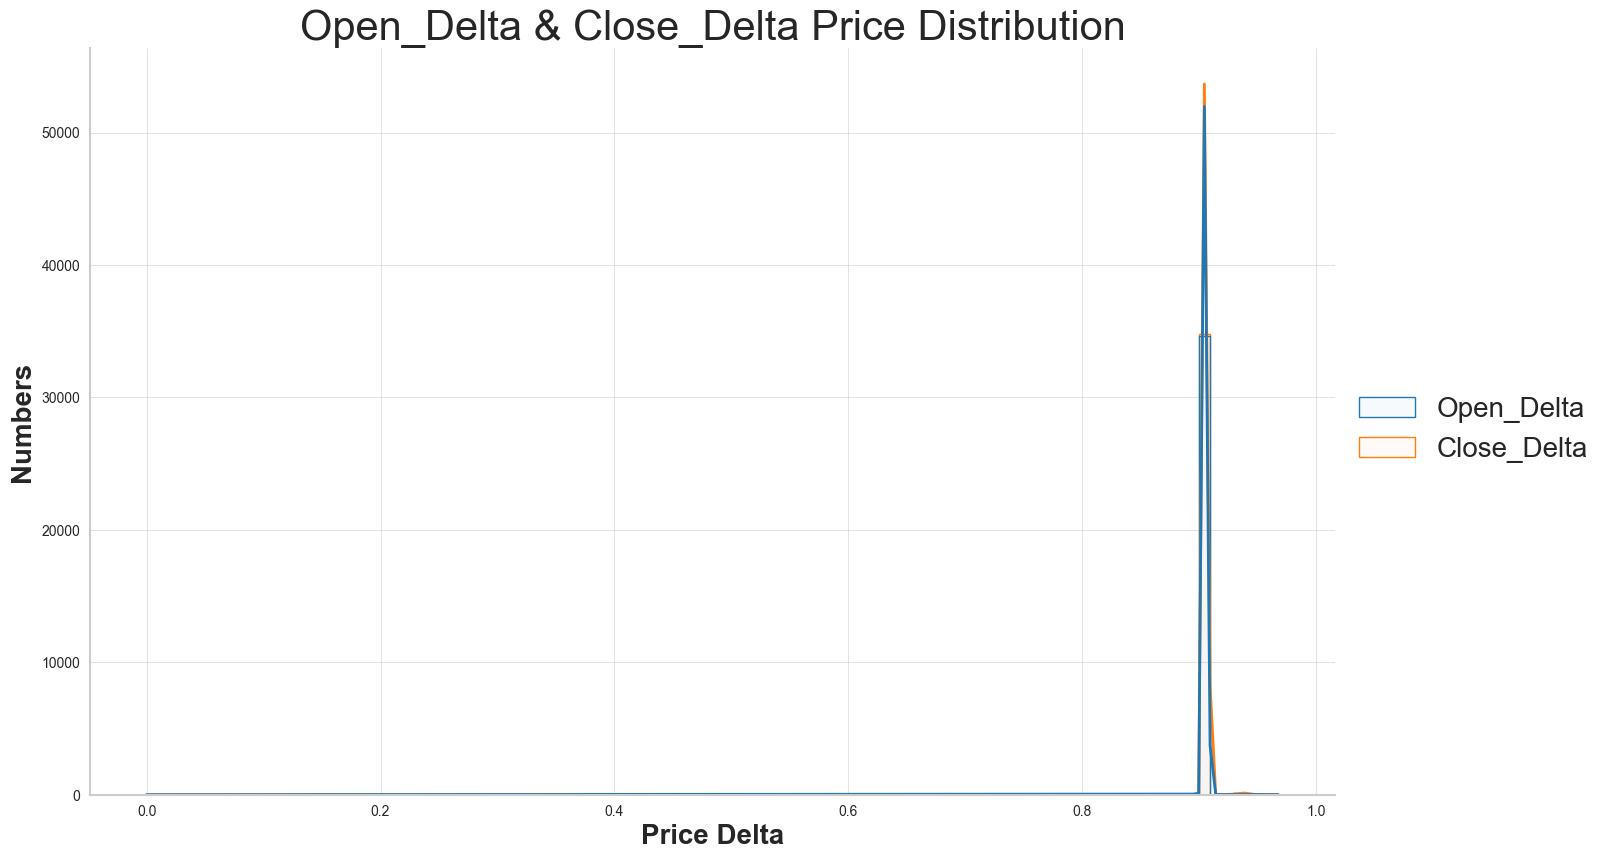

In [91]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show()

In [92]:
#Data transformation
# We will predict the Highest and Lowest prices DURING the next 5 minutes. 

# To do this in the data output (vector of answers), we shift prices sequentially to 5 minutes up, 
# and find max and min prices during these 5 minutes
# Then you need to delete the 5 last rows since there are no prices for the next 5 minutes. 
# Therefore, we will create an array of answers "data_ay" with the Highest and Lowest prices shifted sequentially to 5 rows up.

In [93]:
n = data.shape[0]
n

35220

In [94]:
p = data.shape[1]
p

16

In [95]:
data_ax = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [96]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Volume_Ask        35220 non-null  float32
 6   Volume_Delta      35220 non-null  float32
 7   Volume_Delta_abs  35220 non-null  float32
 8   Open_Delta        35220 non-null  float32
 9   High_Delta        35220 non-null  float32
 10  Low_Delta         35220 non-null  float32
 11  Close_Delta       35220 non-null  float32
 12  New_day           35220 non-null  int8   
 13  New_week          35220 non-null  int8   
dtypes: float32(12), int8(2)
memory usage: 1.7 MB


In [97]:
data_ay = data[['Y_High_Bid', 'Y_Low_Ask']]

In [98]:
data_ay.shape

(35220, 2)

In [99]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,0.665762,0.669593
1,0.677095,0.671349
2,0.671987,0.659856
3,0.653152,0.654110
4,0.660176,0.660016
5,0.666081,0.667997


In [100]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,0.458420,0.460335
35211,0.457302,0.459697
35212,0.457302,0.459697
35213,0.456345,0.458101
35214,0.457143,0.459856
35215,0.457143,0.460176
35216,0.456983,0.460814
35217,0.456983,0.460974
35218,0.458579,0.460654
35219,0.459377,0.462570


In [101]:
data_ay = data_ay.shift(-1)

In [102]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask
0,0.677095,0.671349
1,0.671987,0.659856
2,0.653152,0.654110
3,0.660176,0.660016
4,0.666081,0.667997
5,0.672466,0.670710


In [103]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask
35210,0.457302,0.459697
35211,0.457302,0.459697
35212,0.456345,0.458101
35213,0.457143,0.459856
35214,0.457143,0.460176
35215,0.456983,0.460814
35216,0.456983,0.460974
35217,0.458579,0.460654
35218,0.459377,0.462570
35219,NaN,NaN


In [104]:
# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# Forward-looking window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [105]:
data_ay.head(6)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
0,0.677095,0.671349,0.677095,0.654110
1,0.671987,0.659856,0.672466,0.654110
2,0.653152,0.654110,0.672466,0.654110
3,0.660176,0.660016,0.672466,0.660016
4,0.666081,0.667997,0.672466,0.666241
5,0.672466,0.670710,0.672466,0.666241


In [106]:
data_ay.tail(10)

,Y_High_Bid,Y_Low_Ask,Y_High_Bid_5,Y_Low_Ask_5
35210,0.457302,0.459697,0.457302,0.458101
35211,0.457302,0.459697,0.457302,0.458101
35212,0.456345,0.458101,0.457143,0.458101
35213,0.457143,0.459856,0.458579,0.459856
35214,0.457143,0.460176,0.459377,0.460176
35215,0.456983,0.460814,NaN,NaN
35216,0.456983,0.460974,NaN,NaN
35217,0.458579,0.460654,NaN,NaN
35218,0.459377,0.462570,NaN,NaN
35219,NaN,NaN,NaN,NaN


In [107]:
data_ay =data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'],axis=1)

In [108]:
data_ay.tail(6)

,Y_High_Bid_5,Y_Low_Ask_5
35214,0.459377,0.460176
35215,NaN,NaN
35216,NaN,NaN
35217,NaN,NaN
35218,NaN,NaN
35219,NaN,NaN


In [109]:
# delete the 5 last rows in data_ay (because we don't have answers for the last 5 minutes)

for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)


In [110]:
# delete the last 5 rows in data_ax (because we don't have answers for the last 5 minutes)

for i in range(5):
    data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)

In [111]:
data_ay.shape

(35215, 2)

In [112]:
data_ax.shape

(35215, 14)

In [113]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 


data_a:
[[6.6209e-01 6.6576e-01 6.5906e-01 6.6576e-01 9.5178e-04 9.5998e-04
  1.3318e-01 9.4463e-06 7.8896e-01 7.8896e-01 7.8896e-01 7.8896e-01
  1.0000e+00 1.0000e+00]
 [6.6656e-01 6.7709e-01 6.6656e-01 6.7103e-01 5.0482e-03 3.1589e-03
  1.3129e-01 2.1752e-03 9.0584e-01 8.1494e-01 9.0584e-01 8.4416e-01
  1.0000e+00 0.0000e+00]]


[[4.5411e-01 4.5634e-01 4.5331e-01 4.5555e-01 5.2695e-03 9.5377e-03
  1.3743e-01 4.9139e-03 9.0584e-01 9.0584e-01 9.0584e-01 9.0584e-01
  1.0000e+00 0.0000e+00]
 [4.5555e-01 4.5714e-01 4.5507e-01 4.5714e-01 9.9061e-04 3.9800e-03
  1.3616e-01 3.4416e-03 9.0584e-01 9.0584e-01 9.0584e-01 9.0584e-01
  1.0000e+00 0.0000e+00]]
numpy size: =  (35215, 14)
type:  float32


In [114]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.677095   0.65411013]
 [0.6724661  0.65411013]
 [0.6724661  0.65411013]]


[[0.45714286 0.45810056]
 [0.45857942 0.45985633]
 [0.4593775  0.46017557]]
numpy size: =  (35215, 2)
type:  float64


In [115]:
from tqdm import tqdm

In [116]:
n_small = 30000

N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimentional inputs tensor: ' ,L,N,t)

Size of a three-dimentional inputs tensor:  29950 50 14


In [117]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [118]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and normalised Low_Ask

In [119]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n_small - N - 5 = ', n_small-N-5, L)
#for k in tqdm(range(L-1)):
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid - max 5 minutes future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask -  min 5 minutes future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████████████████████████████| 29950/29950 [00:00<00:00, 60792.19it/s]


29949
data_b: 
 [[[0.66209096 0.6657622  0.6590583  ... 0.78896105 1.         1.        ]
  [0.66656023 0.677095   0.66656023 ... 0.84415585 1.         0.        ]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 1.         0.        ]
  ...
  [0.69114125 0.6964086  0.6901836  ... 0.90584415 1.         0.        ]
  [0.6936951  0.6970471  0.6914605  ... 0.90584415 1.         0.        ]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 1.         0.        ]]

 [[0.66656023 0.677095   0.66656023 ... 0.84415585 1.         0.        ]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 1.         0.        ]
  [0.6526736  0.6531524  0.64644855 ... 0.8474026  1.         0.        ]
  ...
  [0.6936951  0.6970471  0.6914605  ... 0.90584415 1.         0.        ]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 1.         0.        ]
  [0.7114126  0.7122107  0.7056664  ... 0.90584415 1.         0.        ]]

 [[0.67134875 0.67198724 0.6518755  ... 0.84090906 1.         0.        ]
  [0.6

In [120]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)


import random

pp = random.randint(50, L) # (any number before 29950) - just to look at the middle of data_b
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  12817
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.0207502 		 0.028411811
0.02330407 		 0.028411811
0.023144454 		 0.028411811
0.025059856 		 0.029848363
0.024421388 		 0.029848363
0.028411811 		 0.029848363
0.028411811 		 0.029848363
0.028411811 		 0.03415802
0.029848363 		 0.03415802
0.026336791 		 0.03415802
0.028092578 		 0.03415802
0.029369513 		 0.03415802
0.03415802 		 0.032881085
0.032083 		 0.032881085
0.032881085 		 0.03224262


In [121]:
# Each rows of Y above must have maximum of prices of 5 minute ahead
# you can run several times the cell above 

In [122]:
data = []
data_ax = []
data_ay = []
data_a = []
data_y = []

In [123]:
#Train Test Split 
#90% for training and validation
#10% for testing

In [124]:
#!pip install scikit-learn

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1,
                                            shuffle = False, stratify = None, random_state=101)

In [127]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 14)
(26955, 2)
(2995, 50, 14)
(2995, 2)


In [128]:
#Training LSTM

In [129]:
#<html> <h3 style="color:blue;"> LSTM </h3> </html>

In [130]:
#import tensorflow as tf
#from tensorflow import keras

In [131]:
model = keras.Sequential([keras.layers.LSTM(100, activation='relu', input_shape=(50,14)), keras.layers.Dense(2)])

/Users/erick/tf-env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [132]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,202 (180.48 KB)

 Trainable params: 46,202 (180.48 KB)

 Non-trainable params: 0 (0.00 B)

None


In [133]:
#callbacks

In [134]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [135]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [136]:
# Early Stopping parameters

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [137]:
history = model.fit(X_train, y_train, batch_size= 20, epochs=10,
                    validation_split=0.1, shuffle=True,
                    verbose=1, callbacks=[es,mc])

Epoch 1/10
1212/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0170 - mae: 0.0405 
Epoch 1: val_loss improved from None to 0.00008, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - loss: 0.0029 - mae: 0.0137 - val_loss: 7.9408e-05 - val_mae: 0.0060
Epoch 2/10
1212/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.0444e-04 - mae: 0.0072 
Epoch 2: val_loss did not improve from 0.00008
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - loss: 9.9914e-05 - mae: 0.0070 - val_loss: 1.1953e-04 - val_mae: 0.0082
Epoch 3/10
1212/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.5006e-05 - mae: 0.0070 
Epoch 3: val_loss improved from 0.00008 to 0.00006, saving model to best_model_LSTM_GOLD.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - loss: 9.4458e-05 - mae: 0.0070 - val_loss: 5.8390e-05 - val_mae: 0.0050
Epoch 4/10
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.4258e-05 - mae: 0.0070 
Epoch 4: val_loss did not improve from 0.00006
1213/1213 ━━━━

In [138]:
LSTM_saved_best_model = keras.models.load_model('best_model_LSTM_GOLD.keras')

In [139]:
#Test

In [140]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.2665e-05 - mae: 0.0043


In [141]:
scores

[3.2664993341313675e-05, 0.004334696102887392]

In [142]:
print("Mean squared error (mse): %.9f " % (scores[0]))

Mean squared error (mse): 0.000032665 


In [143]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean absolute error (mae): 0.004334696 


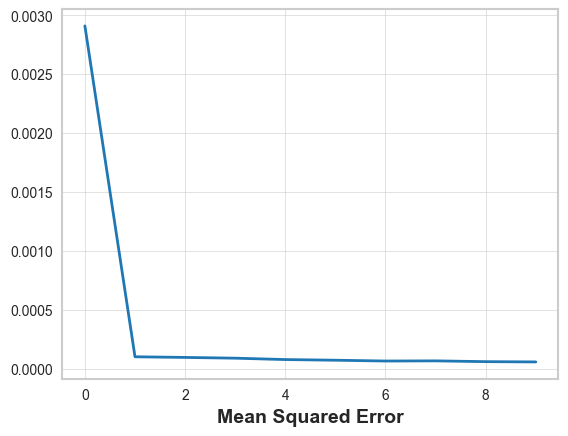

In [144]:
#MSE Training graph
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size=14)
plt.show()

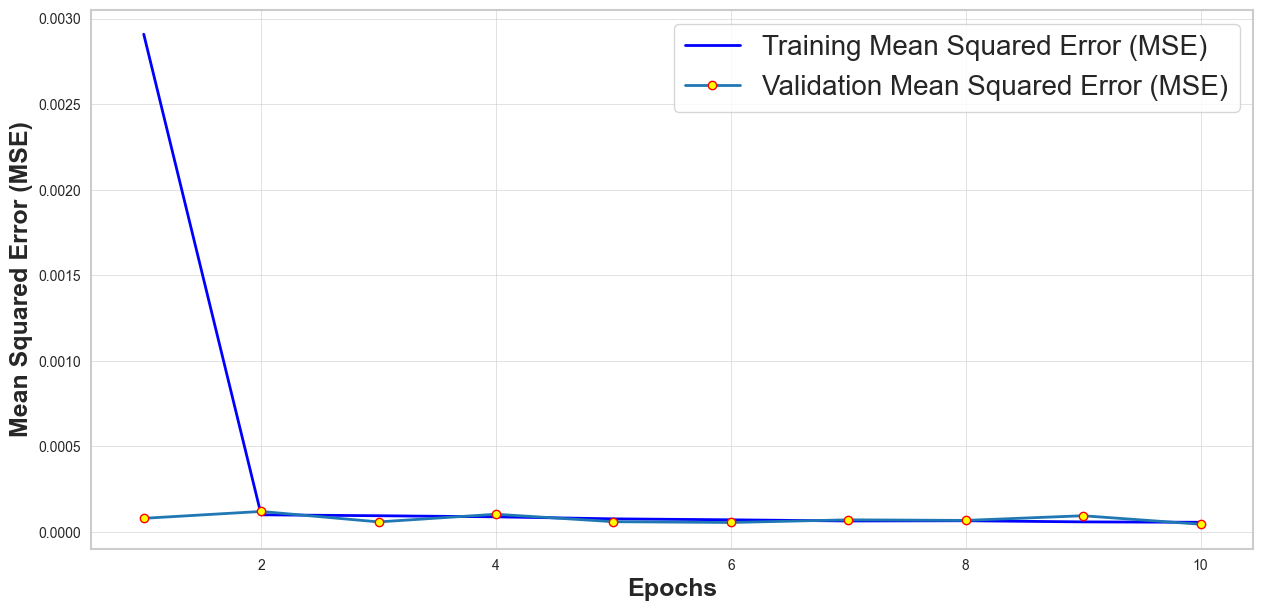

In [145]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

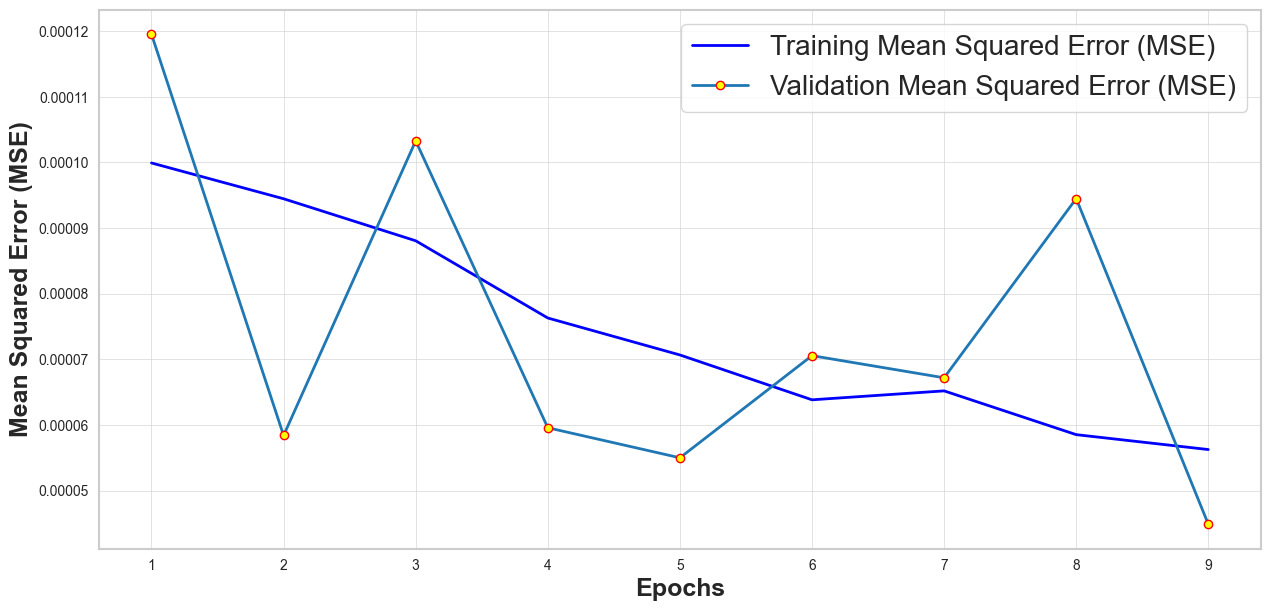

In [146]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

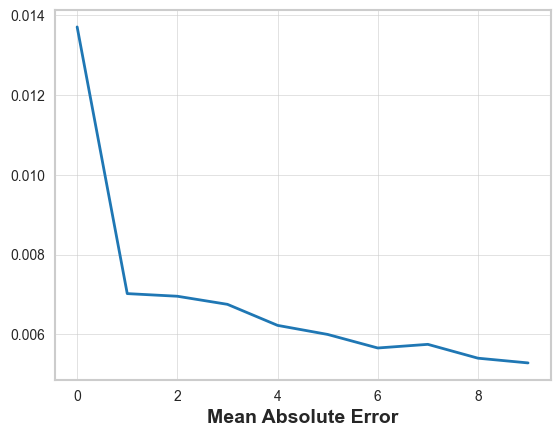

In [147]:
#MAE Traing graph
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute Error', size=14)
plt.show()

In [148]:
mse_values = history.history['mae']
val_mae_values = history.history['val_mae']

epochs = range(1, len(mse_values)+1)  # use training length


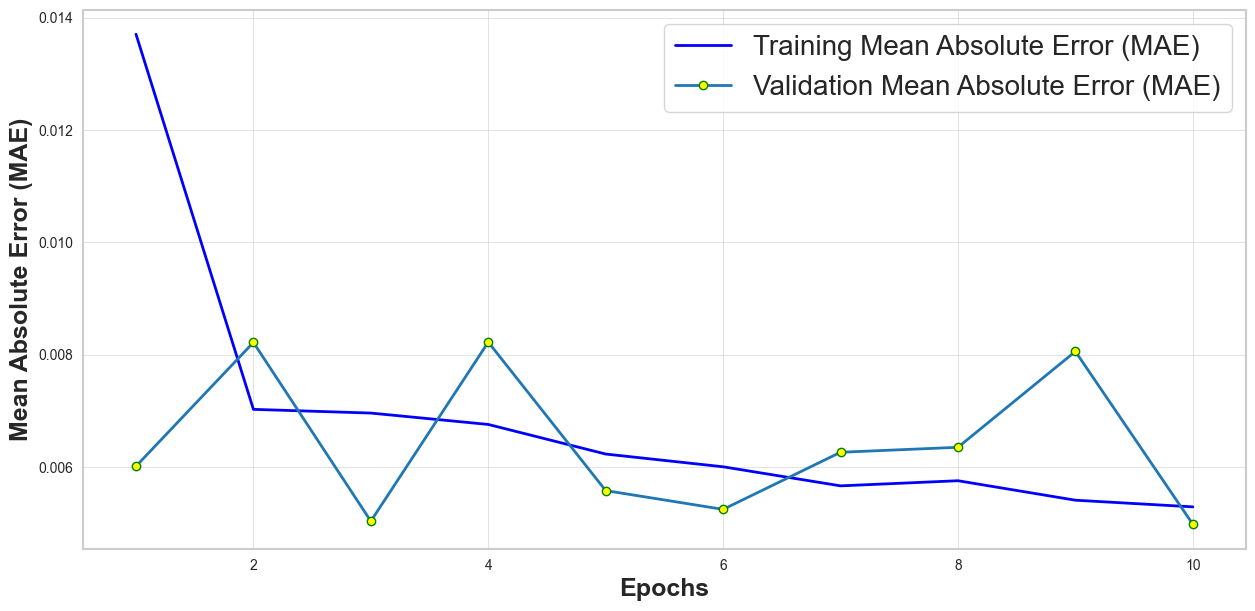

In [149]:

history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Absolute Error (MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Mean Absolute Error (MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error (MAE)', size=18)
plt.legend()
plt.show()

In [150]:
#predict 5 minutes ahead
pred = LSTM_saved_best_model(X_test)
print(pred)

tf.Tensor(
[[0.6387446  0.6311185 ]
 [0.6386734  0.6313656 ]
 [0.63906467 0.63213474]
 ...
 [0.5910086  0.5843678 ]
 [0.5905767  0.584045  ]
 [0.59088135 0.5845424 ]], shape=(2995, 2), dtype=float32)


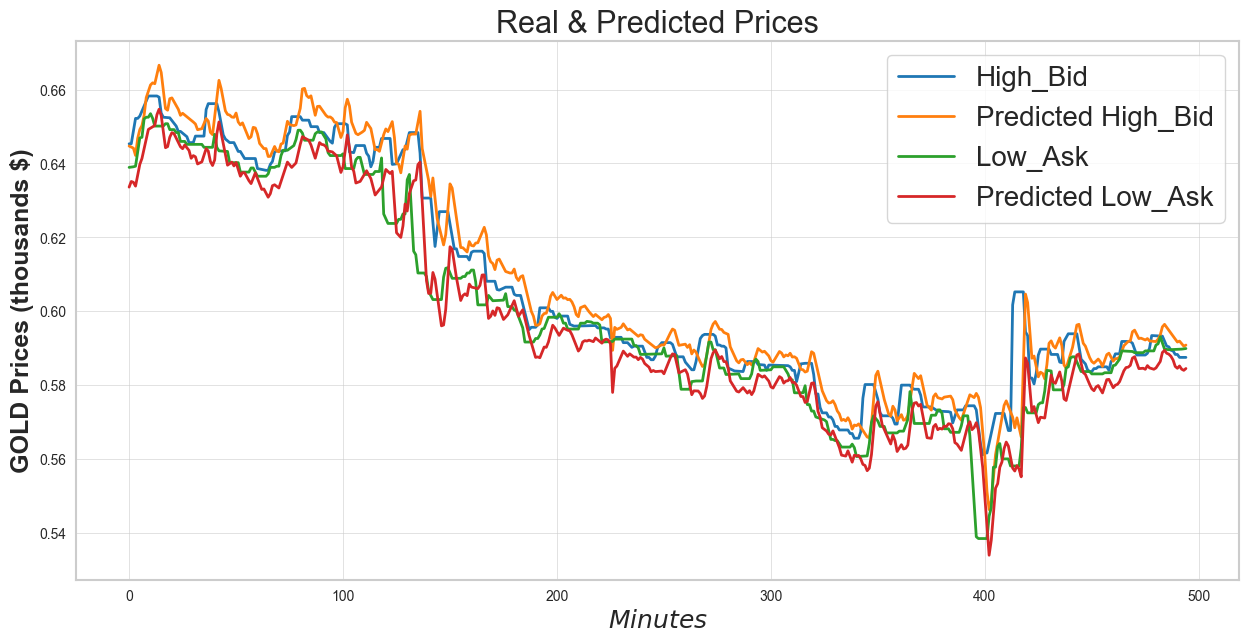

In [151]:
N1=2500  # The first minute for the chart  
LL = 500  # Duration (in minutes) for the chart
N2=N1+LL  # the last minute for the chart

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Prices', size=22)
plt.ylabel('GOLD Prices (thousands $)', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()


In [152]:
#error chart

In [153]:
max_price = 2070.778
min_price = 1614.71
average_price = (max_price + min_price)/2

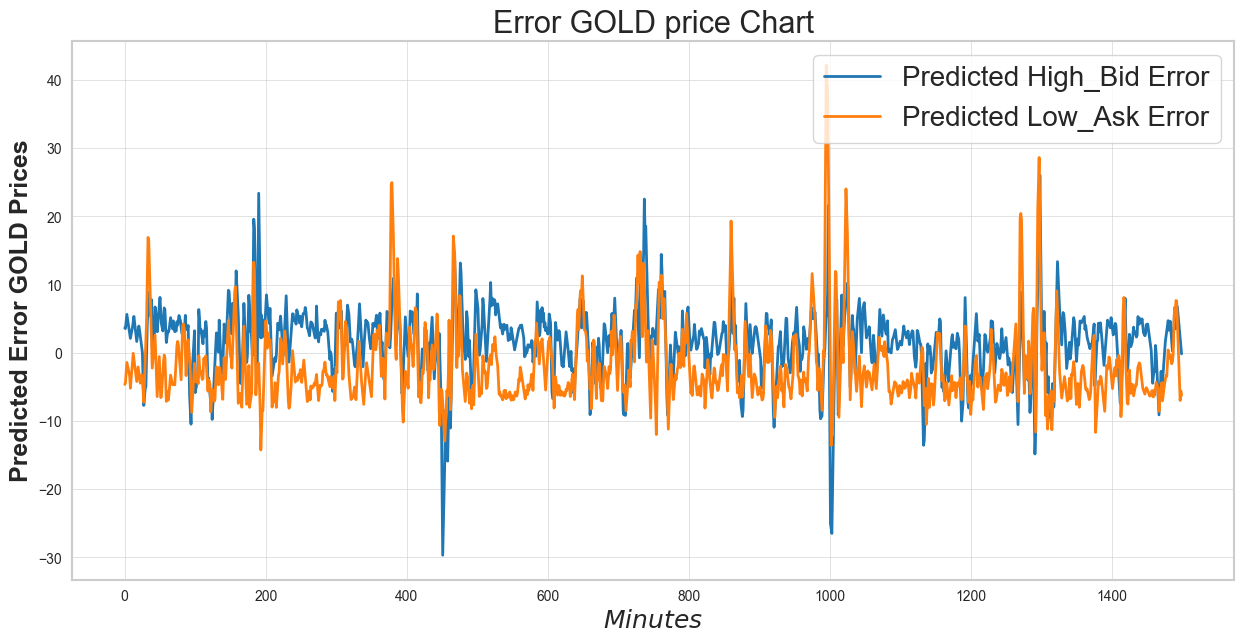

In [154]:
N1=0  # The first minute for the chart  
LL = 1500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000
b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100


line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error GOLD price Chart', size=22)
plt.ylabel('Predicted Error GOLD Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()